# Monte Carlo Portfolio Optimisation with RiskOptima

In [15]:
!pip install --upgrade riskoptima

  Attempting uninstall: riskoptima
    Found existing installation: riskoptima 1.15.0
    Uninstalling riskoptima-1.15.0:
      Successfully uninstalled riskoptima-1.15.0


In [1]:
import pandas as pd
from riskoptima import RiskOptima

import warnings
warnings.filterwarnings(
    "ignore", 
    category=FutureWarning, 
    message=".*DataFrame.std with axis=None is deprecated.*"
)

# Define your current porfolio with your weights and company names
asset_data = [
    {"Asset": "MO",    "Weight": 0.04, "Label": "Altria Group Inc.",       "MarketCap": 110.0e9},
    {"Asset": "NWN",   "Weight": 0.14, "Label": "Northwest Natural Gas",   "MarketCap": 1.8e9},
    {"Asset": "BKH",   "Weight": 0.01, "Label": "Black Hills Corp.",         "MarketCap": 4.5e9},
    {"Asset": "ED",    "Weight": 0.01, "Label": "Con Edison",                "MarketCap": 30.0e9},
    {"Asset": "PEP",   "Weight": 0.09, "Label": "PepsiCo Inc.",              "MarketCap": 255.0e9},
    {"Asset": "NFG",   "Weight": 0.16, "Label": "National Fuel Gas",         "MarketCap": 5.6e9},
    {"Asset": "KO",    "Weight": 0.06, "Label": "Coca-Cola Company",         "MarketCap": 275.0e9},
    {"Asset": "FRT",   "Weight": 0.28, "Label": "Federal Realty Inv. Trust", "MarketCap": 9.8e9},
    {"Asset": "GPC",   "Weight": 0.16, "Label": "Genuine Parts Co.",         "MarketCap": 25.3e9},
    {"Asset": "MSEX",  "Weight": 0.05, "Label": "Middlesex Water Co.",       "MarketCap": 2.4e9}
]
asset_table = pd.DataFrame(asset_data)

capital = 100_000

asset_table['Portfolio'] = asset_table['Weight'] * capital

print(asset_table)

  Asset  Weight                      Label     MarketCap  Portfolio
0    MO    0.04          Altria Group Inc.  1.100000e+11     4000.0
1   NWN    0.14      Northwest Natural Gas  1.800000e+09    14000.0
2   BKH    0.01          Black Hills Corp.  4.500000e+09     1000.0
3    ED    0.01                 Con Edison  3.000000e+10     1000.0
4   PEP    0.09               PepsiCo Inc.  2.550000e+11     9000.0
5   NFG    0.16          National Fuel Gas  5.600000e+09    16000.0
6    KO    0.06          Coca-Cola Company  2.750000e+11     6000.0
7   FRT    0.28  Federal Realty Inv. Trust  9.800000e+09    28000.0
8   GPC    0.16          Genuine Parts Co.  2.530000e+10    16000.0
9  MSEX    0.05        Middlesex Water Co.  2.400000e+09     5000.0


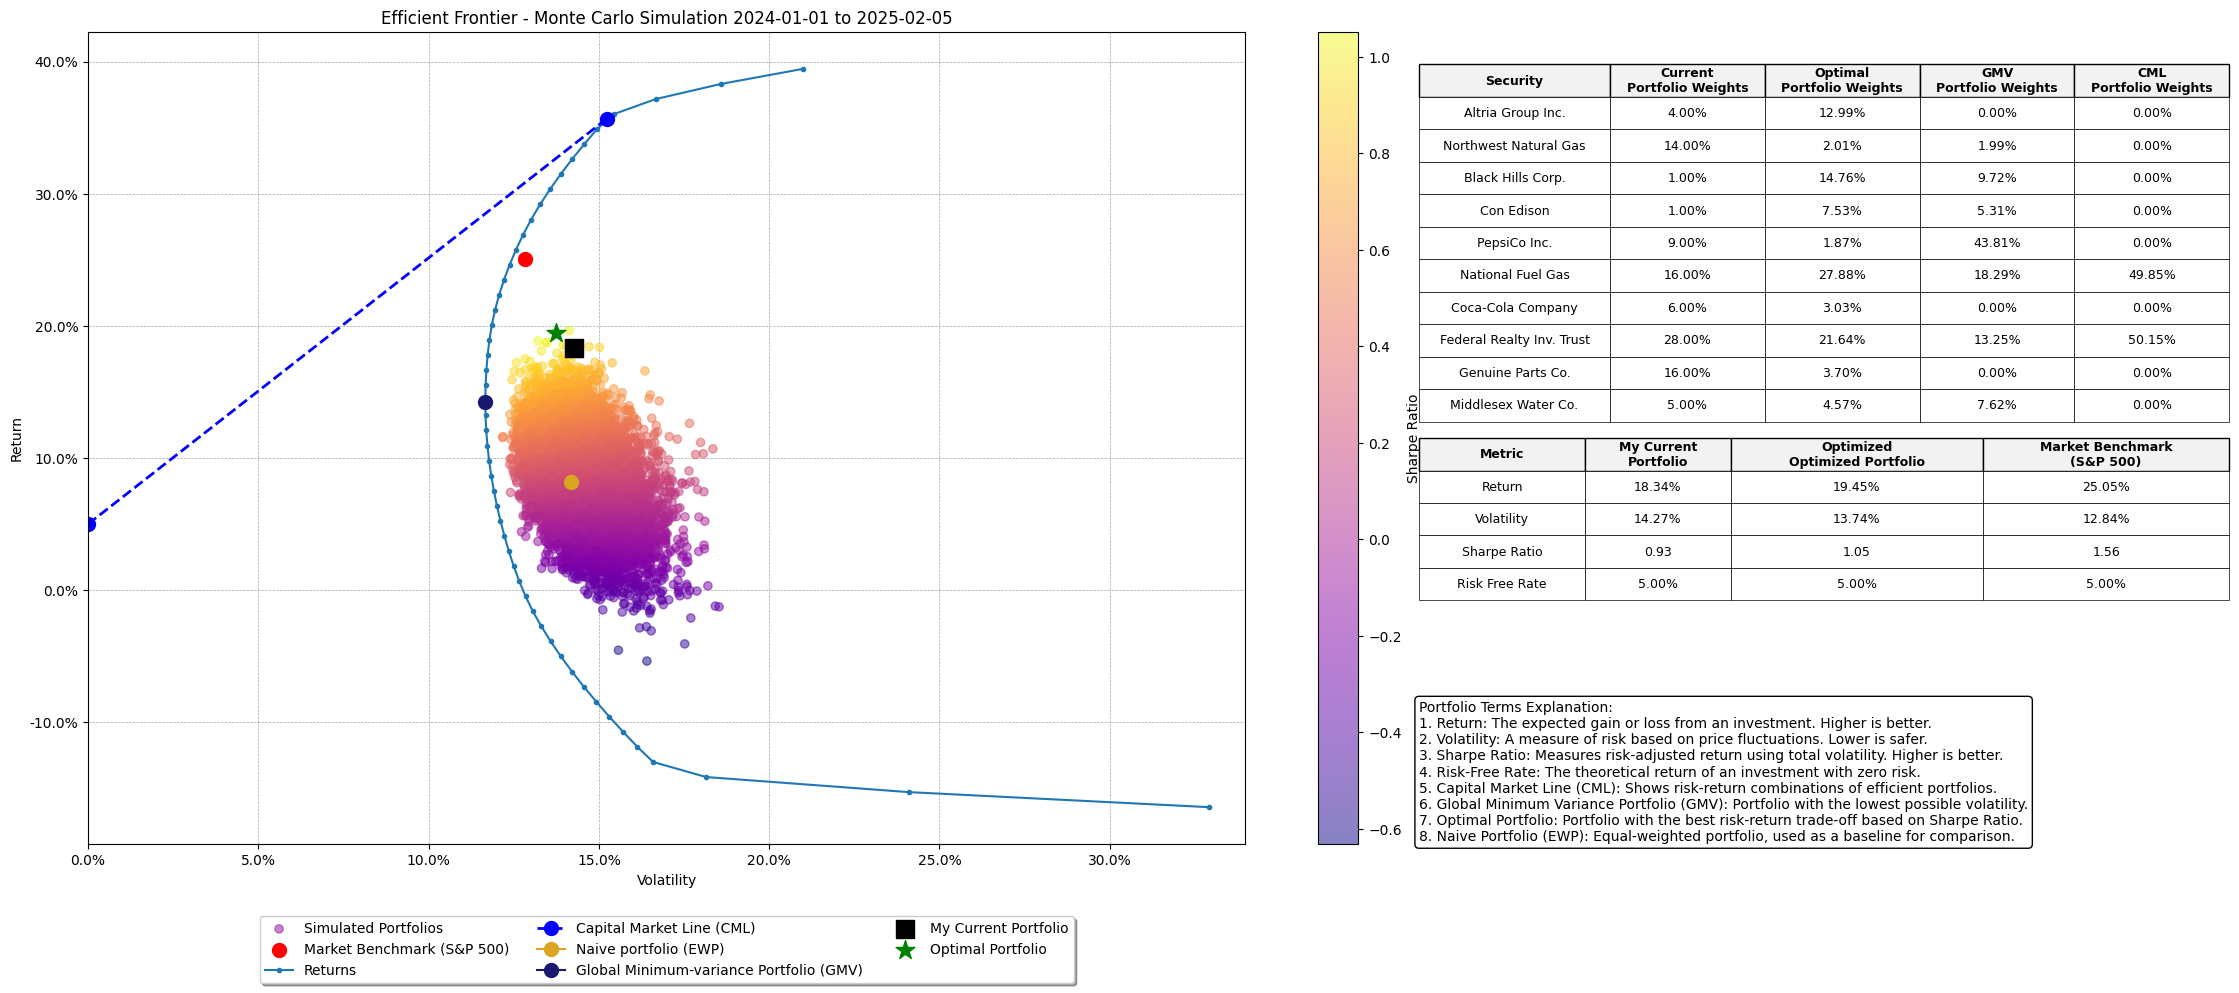

In [2]:
start_date = '2024-01-01'
end_date = RiskOptima.get_previous_working_day()

RiskOptima.plot_efficient_frontier_monte_carlo(
    asset_table,
    start_date=start_date,
    end_date=end_date,
    risk_free_rate=0.05,
    num_portfolios=10000,
    market_benchmark='SPY',
    set_ticks=False,
    x_pos_table=1.15,    # Position for the weight table on the plot
    y_pos_table=0.52,    # Position for the weight table on the plot
    title=f'Efficient Frontier - Monte Carlo Simulation {start_date} to {end_date}'
)

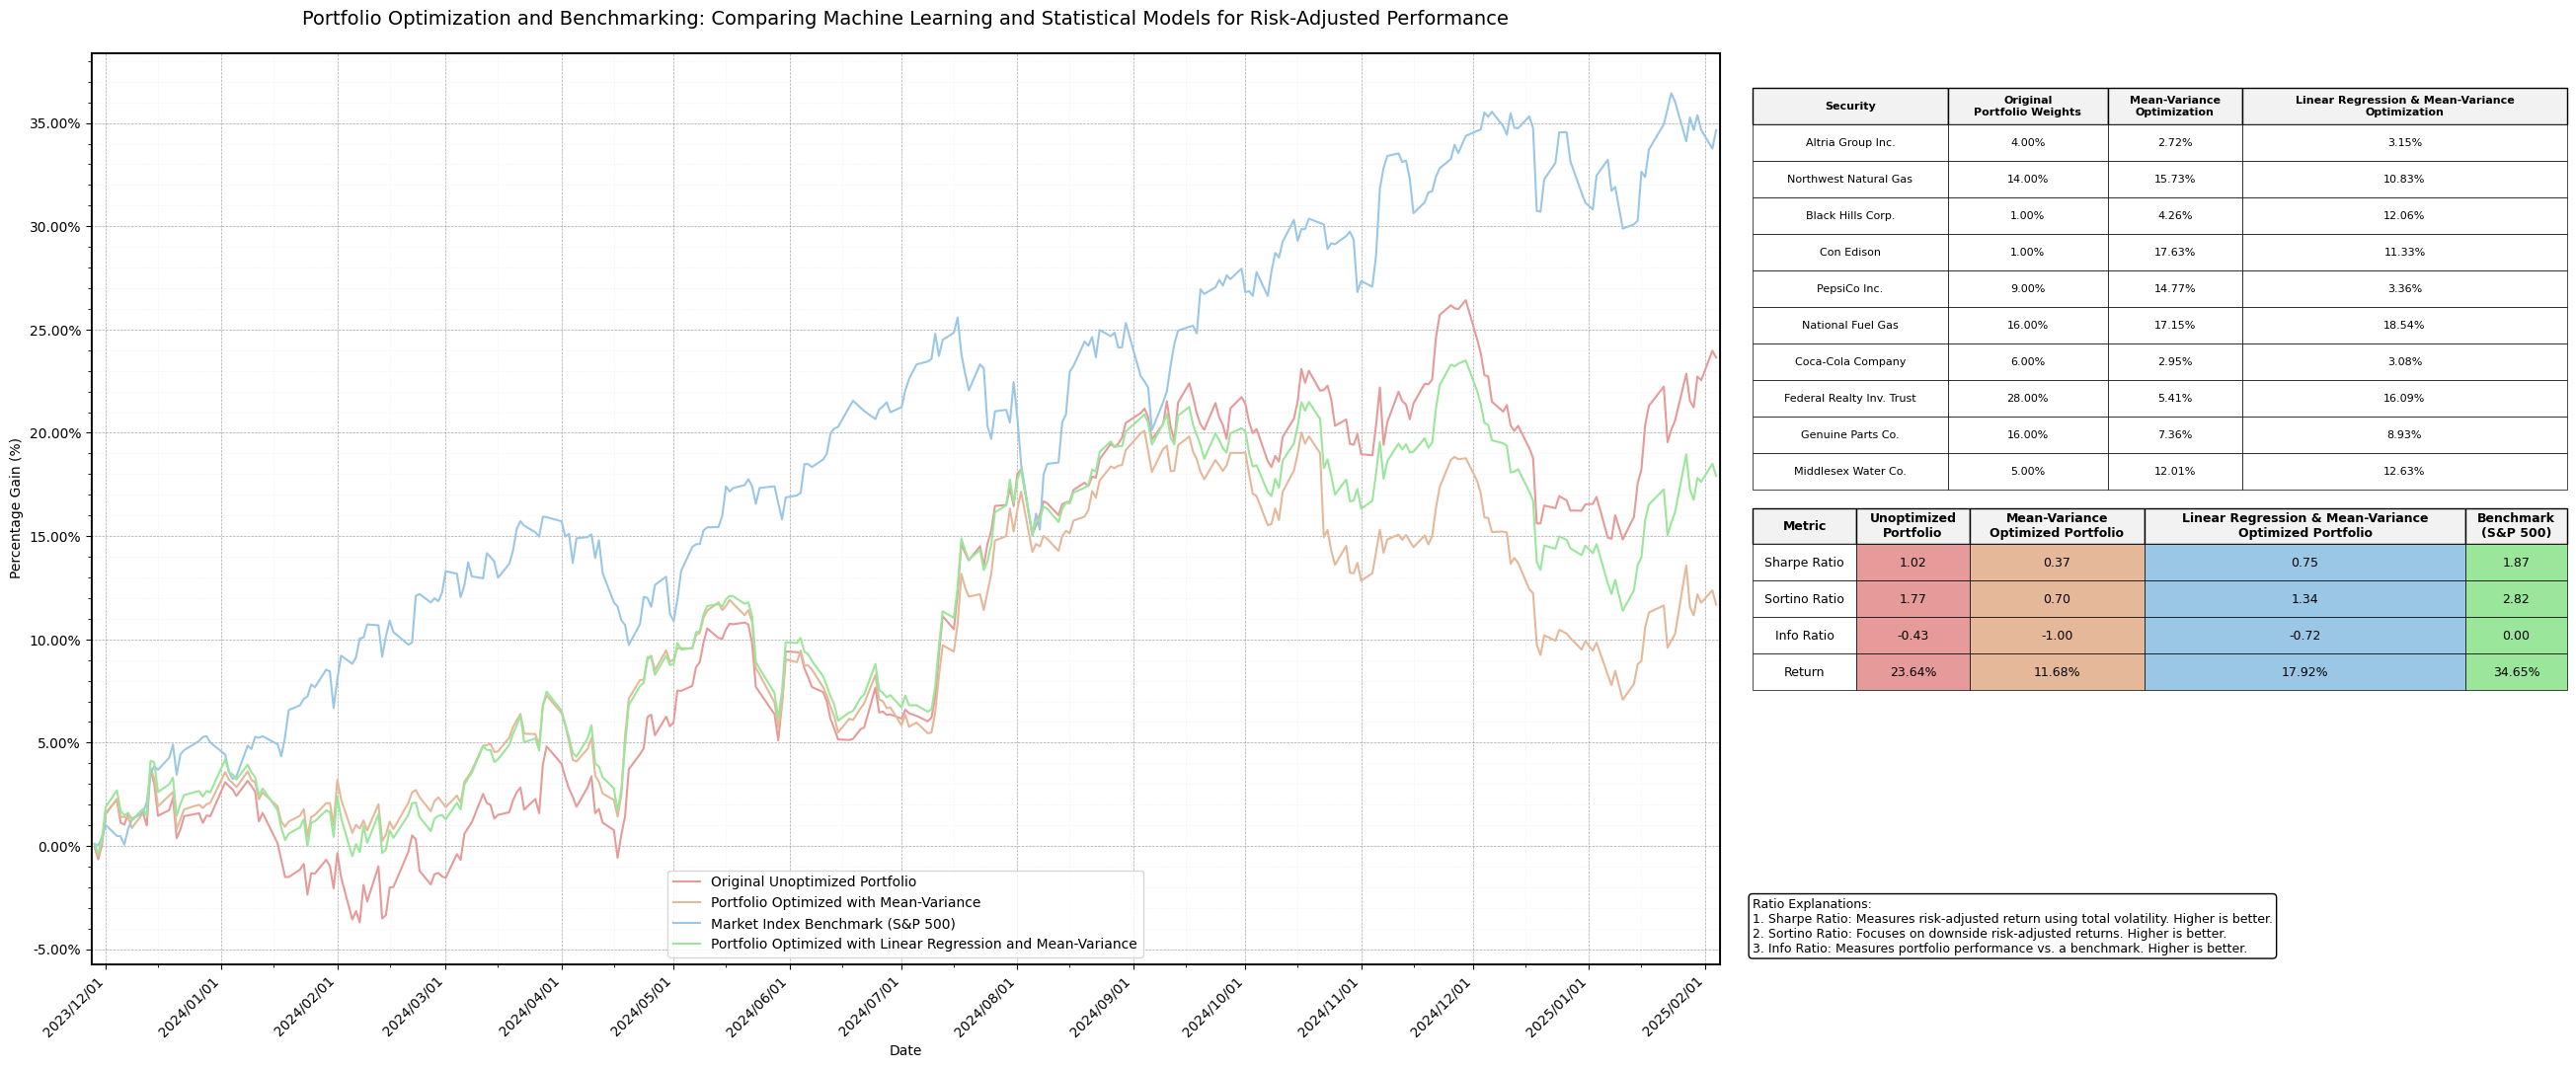

In [3]:
RiskOptima.run_portfolio_optimization_mv_ml(
    asset_table=asset_table,
    training_start_date='2022-01-01',
    training_end_date='2023-11-27',
    model_type='Linear Regression',    
    risk_free_rate=0.05,
    num_portfolios=100000,
    market_benchmark=['SPY'],
    max_volatility=0.25,
    min_weight=0.03,
    max_weight=0.2
)

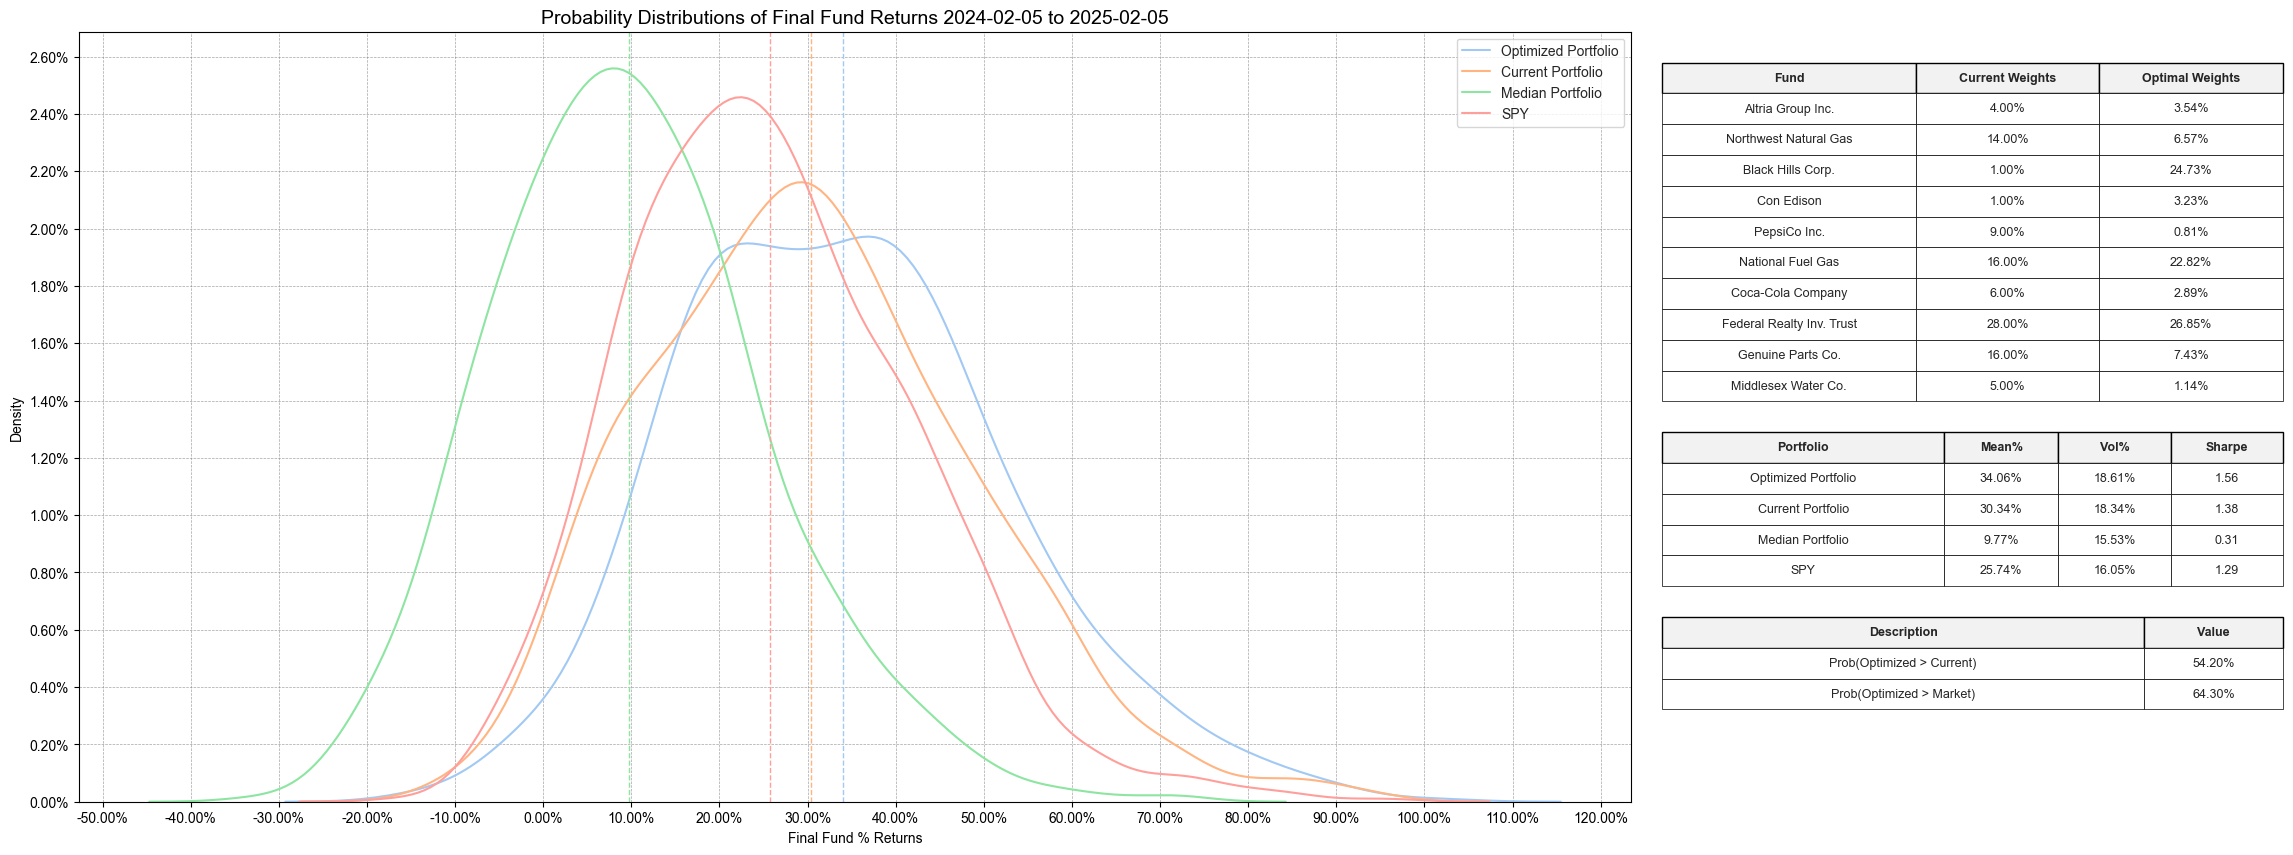

In [7]:
ANALYSIS_START_DATE = RiskOptima.get_previous_year_date(RiskOptima.get_previous_working_day(), 1)
ANALYSIS_END_DATE   = RiskOptima.get_previous_working_day()
BENCHMARK_INDEX     = 'SPY'
RISK_FREE_RATE      = 0.05
NUMBER_OF_WEIGHTS   = 10_000
NUMBER_OF_MC_RUNS   = 1_000

RiskOptima.run_portfolio_probability_analysis(
    asset_table=asset_table,
    analysis_start_date=ANALYSIS_START_DATE,
    analysis_end_date=ANALYSIS_END_DATE,
    benchmark_index=BENCHMARK_INDEX,
    risk_free_rate=RISK_FREE_RATE,
    number_of_portfolio_weights=NUMBER_OF_WEIGHTS,
    trading_days_per_year=RiskOptima.get_trading_days(),
    number_of_monte_carlo_runs=NUMBER_OF_MC_RUNS
)